In [7]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import re
import pandas as pd

# Regular expression patterns
prog_run_pattern = r"Prog (.*), Run (\d+)"
cycles_pattern = r"(\d+(?:,\d{3})*)\s+cycles"
instructions_pattern = r"(\d+(?:,\d{3})*)\s+instructions"
insn_per_cycle_pattern = r"#\s+(\d+\.\d+)\s+insn per cycle"
dcache_load_misses_pattern = r"(\d+(?:,\d{3})*)\s+L1-dcache-load-misses"
dcache_accesses_pattern = r"#\s+(\d+\.\d+)% of all L1-dcache accesses"
dcache_loads_pattern = r"(\d+(?:,\d{3})*)\s+L1-dcache-loads"
time_elapsed_pattern = r"(\d+\.\d+)\s+seconds time elapsed"

data = []

# Open the performance data file
with open('opt.log', 'r') as file:
    lines = file.readlines()

# Iterate over the lines
for line in lines:
    if "Prog" in line:
        prog_run_match = re.search(prog_run_pattern, line)
        current_prog = prog_run_match.group(1)
        current_run = int(prog_run_match.group(2))
        current_data = {'Program': current_prog, 'Run': current_run}
    elif "cycles" in line:
        current_data['cycles'] = int(re.search(cycles_pattern, line).group(1).replace(',', ''))
    elif "instructions" in line:
        current_data['instructions'] = int(re.search(instructions_pattern, line).group(1).replace(',', ''))
        current_data['insn per cycle'] = float(re.search(insn_per_cycle_pattern, line).group(1))
    elif "L1-dcache-load-misses" in line:
        current_data['L1-dcache-load-misses'] = int(re.search(dcache_load_misses_pattern, line).group(1).replace(',', ''))
        current_data['% of all L1-dcache accesses'] = float(re.search(dcache_accesses_pattern, line).group(1))
    elif "L1-dcache-loads" in line:
        current_data['L1-dcache-loads'] = int(re.search(dcache_loads_pattern, line).group(1).replace(',', ''))
    elif "seconds time elapsed" in line:
        current_data['seconds time elapsed'] = float(re.search(time_elapsed_pattern, line).group(1))
        data.append(current_data)

df = pd.DataFrame(data)
average_df = df.groupby('Program').mean().reset_index()
# Extract block size from program name
average_df['Block Size'] = average_df['Program'].str.extract('(\d+)').fillna(0).astype(int)
average_df.sort_values(by=['Block Size'], inplace=True)
average_df.to_csv('opt.csv', index=False)


NameError: name 'current_data' is not defined

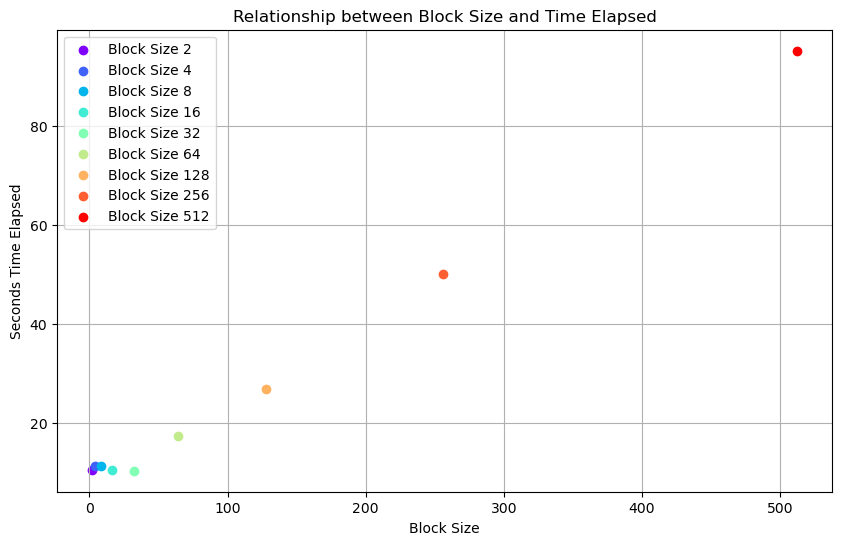

In [22]:
# Exclude the reference program
df_no_ref = average_df[average_df['Program'] != 'iom_cpp.out']

# Create a color map
colors = plt.cm.rainbow(np.linspace(0, 1, len(df_no_ref['Block Size'].unique())))

# Create the plot
plt.figure(figsize=(10, 6))

for color, block_size in zip(colors, df_no_ref['Block Size'].unique()):
    data = df_no_ref[df_no_ref['Block Size'] == block_size]
    plt.scatter(data['Block Size'], data['seconds time elapsed'], color=color, label=f'Block Size {block_size}')

plt.xlabel('Block Size')
plt.ylabel('Seconds Time Elapsed')
plt.title('Relationship between Block Size and Time Elapsed')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
import re
import pandas as pd

# Regular expression patterns
node_thread_pattern = r"Running on (.+) with (\d+) threads."
program_name_pattern = r"<INPUT_PATH>: ./test/test_g(\d+)_r(\d+)_c(\d+)_i(\d+).in"
cycles_pattern = r"(\d+(,\d+)*)\s+cycles"
instructions_pattern = r"(\d+(,\d+)*)\s+instructions"
insn_per_cycle_pattern = r"#\s+(\d+\.\d+)\s+insn per cycle"
dcache_load_misses_pattern = r"(\d+(,\d+)*)\s+L1-dcache-load-misses"
dcache_accesses_pattern = r"#\s+(\d+\.\d+)% of all L1-dcache accesses"
dcache_loads_pattern = r"(\d+(,\d+)*)\s+L1-dcache-loads"
time_elapsed_pattern = r"(\d+\.\d+)\s+seconds time elapsed"

data = []

# Open the performance data file
with open('008-threads.log', 'r') as file:
    lines = file.readlines()

# Iterate over the lines
for line in lines:
    if "Running on" in line:
        node_thread_match = re.search(node_thread_pattern, line)
        current_node = node_thread_match.group(1)
        current_thread = int(node_thread_match.group(2))
        current_data = {'Node': current_node, 'Thread': current_thread}
    elif "<INPUT_PATH>" in line:
        program_name_match = re.search(program_name_pattern, line)
        current_data['Generations'] = int(program_name_match.group(1))
        current_data['Rows'] = int(program_name_match.group(2))
        current_data['Columns'] = int(program_name_match.group(3))
        current_data['Invasions'] = int(program_name_match.group(4))
    elif "cycles" in line:
        current_data['Cycles'] = int(re.search(cycles_pattern, line).group(1).replace(',', ''))
    elif "instructions" in line:
        current_data['Instructions'] = int(re.search(instructions_pattern, line).group(1).replace(',', ''))
        current_data['Instructions per Cycle'] = float(re.search(insn_per_cycle_pattern, line).group(1))
    elif "L1-dcache-load-misses" in line:
        current_data['L1-dcache-load-misses'] = int(re.search(dcache_load_misses_pattern, line).group(1).replace(',', ''))
        current_data['% of all L1-dcache accesses'] = float(re.search(dcache_accesses_pattern, line).group(1))
    elif "L1-dcache-loads" in line:
        current_data['L1-dcache-loads'] = int(re.search(dcache_loads_pattern, line).group(1).replace(',', ''))
    elif "seconds time elapsed" in line:
        current_data['Seconds Time Elapsed'] = float(re.search(time_elapsed_pattern, line).group(1))
        data.append(current_data)

df = pd.DataFrame(data)
df.to_csv('008-threads.csv', index=False)


In [7]:
import re
import pandas as pd

# Regular expression patterns
node_thread_pattern = r"Running on (.+) with (\d+) threads."
program_name_pattern = r"<INPUT_PATH>: ./test/test_g(\d+)_r(\d+)_c(\d+)_i(\d+).in"
cycles_pattern = r"(\d+,\d+)\s+cycles"
instructions_pattern = r"(\d+,\d+)\s+instructions"
insn_per_cycle_pattern = r"#\s+([\d.]+)\s+insn per cycle"
dcache_load_misses_pattern = r"(\d+,\d+)\s+L1-dcache-load-misses"
dcache_accesses_pattern = r"#\s+([\d.]+)% of all L1-dcache accesses"
dcache_loads_pattern = r"(\d+,\d+)\s+L1-dcache-loads"
time_elapsed_pattern = r"(\d+\.\d+)\s+seconds time elapsed"

data = []

# Open the performance data file
with open('019-1.log', 'r') as file:
    lines = file.readlines()

# Initialize current_data dictionary
current_data = {}

# Iterate over the lines
for line in lines:
    if "Running on" in line:
        node_thread_match = re.search(node_thread_pattern, line)
        if node_thread_match:
            current_data['Node'] = node_thread_match.group(1)
            current_data['Thread'] = int(node_thread_match.group(2))
    elif "<INPUT_PATH>" in line:
        program_name_match = re.search(program_name_pattern, line)
        current_data['Generations'] = int(program_name_match.group(1))
        current_data['Rows'] = int(program_name_match.group(2))
        current_data['Columns'] = int(program_name_match.group(3))
        current_data['Invasions'] = int(program_name_match.group(4))
    elif "cycles" in line:
        current_data['Cycles'] = int(re.search(cycles_pattern, line).group(1).replace(',', ''))
    elif "instructions" in line:
        current_data['Instructions'] = int(re.search(instructions_pattern, line).group(1).replace(',', ''))
        current_data['Instructions per Cycle'] = float(re.search(insn_per_cycle_pattern, line).group(1))
    elif "L1-dcache-load-misses" in line:
        current_data['L1-dcache-load-misses'] = int(re.search(dcache_load_misses_pattern, line).group(1).replace(',', ''))
        current_data['% of all L1-dcache accesses'] = float(re.search(dcache_accesses_pattern, line).group(1))
    elif "L1-dcache-loads" in line:
        current_data['L1-dcache-loads'] = int(re.search(dcache_loads_pattern, line).group(1).replace(',', ''))
    elif "seconds time elapsed" in line:
        current_data['Seconds Time Elapsed'] = float(re.search(time_elapsed_pattern, line).group(1))
        data.append(current_data)
        # Reset current_data dictionary for the next iteration
        current_data = {}

df = pd.DataFrame(data)
df.to_csv('019-threads.csv', index=False)


1.

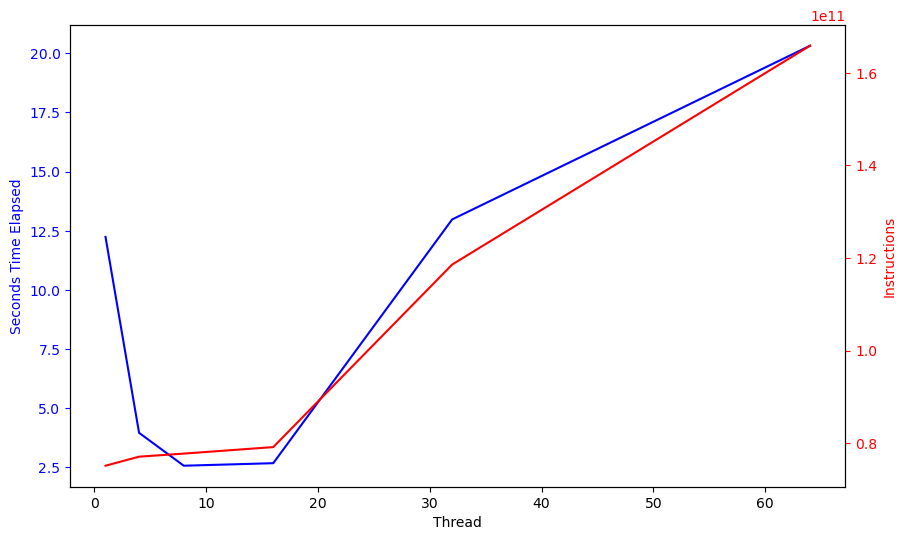

In [12]:
filtered_df = df[(df['Rows'] == 50) & (df['Columns'] == 60) & (df['Invasions'] == 200)]

# Create the figure and the first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot 'Seconds Time Elapsed'
ax1.plot(filtered_df['Thread'], filtered_df['Seconds Time Elapsed'], color='blue', label='Seconds Time Elapsed')
ax1.set_xlabel('Thread')
ax1.set_ylabel('Seconds Time Elapsed', color='blue')
ax1.tick_params('y', colors='blue')

# Create the second y-axis and plot 'Instructions'
ax2 = ax1.twinx()
ax2.plot(filtered_df['Thread'], filtered_df['Instructions'], color='red', label='Instructions')
ax2.set_ylabel('Instructions', color='red')
ax2.tick_params('y', colors='red')

# Add a title
# plt.title('')

# Show the plot
plt.show()


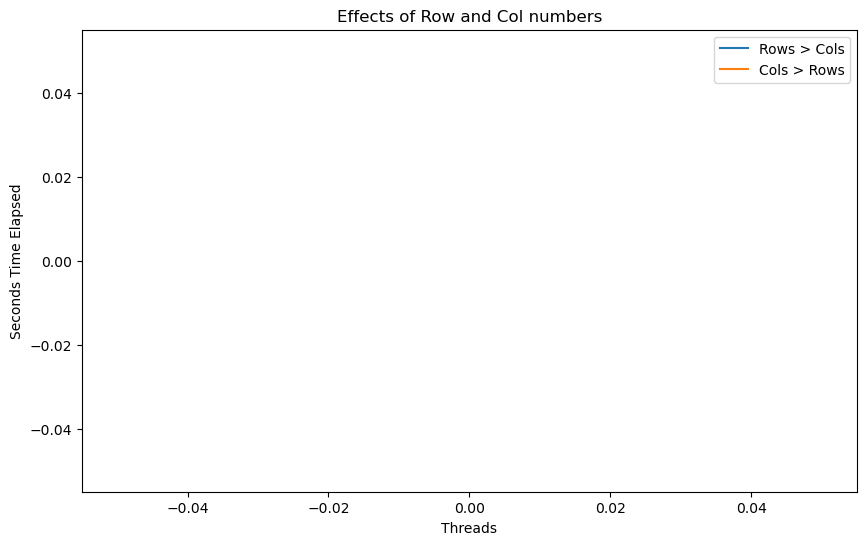

In [9]:
df['Cells'] = df['Rows'] * df['Columns']
df_cmr = df[(df['Rows'] == 30) & (df['Columns'] == 100) & (df['Invasions'] == 200)]
df_rmc = df[(df['Rows'] == 100) & (df['Columns'] == 30) & (df['Invasions'] == 200)]

plt.figure(figsize=(10, 6))

# Plot 'Seconds Time Elapsed'
plt.plot(df_rmc['Thread'], df_rmc['Seconds Time Elapsed'], label='Rows > Cols')

# Plot 'Instructions per Cycle'
plt.plot(df_cmr['Thread'], df_cmr['Seconds Time Elapsed'], label='Cols > Rows')

plt.xlabel('Threads')
plt.ylabel('Seconds Time Elapsed')
plt.title('Effects of Row and Col numbers')
plt.legend()
plt.show()


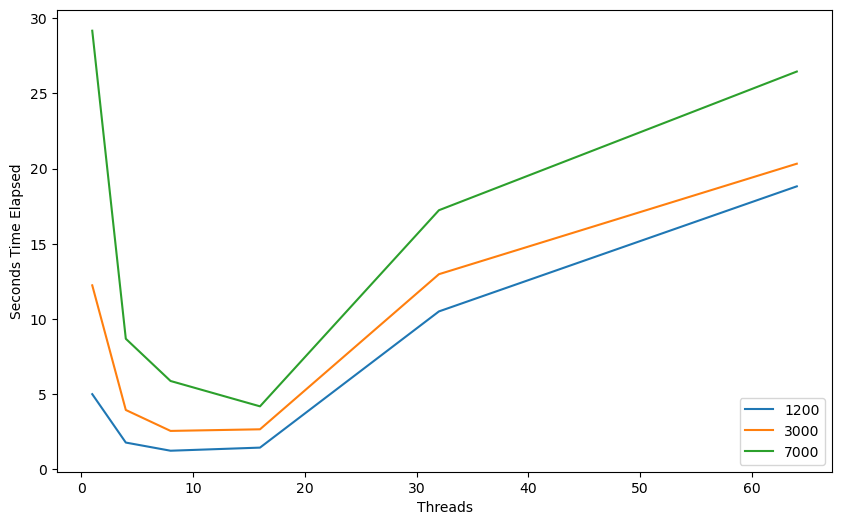

In [25]:
df['Cells'] = df['Rows'] * df['Columns']
df_1 = df[(df['Cells'] == 1200)]
df_2 = df[(df['Rows'] == 50) & (df['Columns'] == 60) & (df['Cells'] == 3000) & (df['Invasions'] == 200)]
df_3 = df[(df['Cells'] == 7200)]

plt.figure(figsize=(10, 6))

# Plot 'Seconds Time Elapsed'
plt.plot(df_1['Thread'], df_1['Seconds Time Elapsed'], label='1200')
plt.plot(df_2['Thread'], df_2['Seconds Time Elapsed'], label='3000')
plt.plot(df_3['Thread'], df_3['Seconds Time Elapsed'], label='7000')

plt.xlabel('Threads')
plt.ylabel('Seconds Time Elapsed')
plt.legend()
plt.show()

In [4]:
import re
import pandas as pd

# Regular expression patterns
node_thread_pattern = r"Running on (.+) with (\d+) threads."
program_name_pattern = r"<INPUT_PATH>: ./test/test_g(\d+)_r(\d+)_c(\d+)_i(\d+).in"
cycles_pattern = r"(\d+)\s+cycles"
instructions_pattern = r"(\d+)\s+instructions"
insn_per_cycle_pattern = r"#\s+(\d+\.\d+)\s+insn per cycle"
dcache_load_misses_pattern = r"(\d+)\s+L1-dcache-load-misses"
dcache_accesses_pattern = r"#\s+(\d+\.\d+)% of all L1-dcache accesses"
dcache_loads_pattern = r"(\d+)\s+L1-dcache-loads"
time_elapsed_pattern = r"(\d+\.\d+)\s+seconds time elapsed"

data = []

# Open the performance data file
with open('resultGeneration.log', 'r') as file:
    lines = file.readlines()

# Initialize current_data dictionary
current_data = {}

# Iterate over the lines
for line in lines:
    if "Running on" in line:
        node_thread_match = re.search(node_thread_pattern, line)
        current_data['Node'] = node_thread_match.group(1)
        current_data['Thread'] = int(node_thread_match.group(2))
    elif "<INPUT_PATH>" in line:
        program_name_match = re.search(program_name_pattern, line)
        current_data['Generations'] = int(program_name_match.group(1))
        current_data['Rows'] = int(program_name_match.group(2))
        current_data['Columns'] = int(program_name_match.group(3))
        current_data['Invasions'] = int(program_name_match.group(4))
    elif "cycles" in line:
        current_data['Cycles'] = int(re.search(cycles_pattern, line).group(1).replace(',', ''))
    elif "instructions" in line:
        current_data['Instructions'] = int(re.search(instructions_pattern, line).group(1).replace(',', ''))
        current_data['Instructions per Cycle'] = float(re.search(insn_per_cycle_pattern, line).group(1))
    elif "L1-dcache-load-misses" in line:
        current_data['L1-dcache-load-misses'] = int(re.search(dcache_load_misses_pattern, line).group(1).replace(',', ''))
        current_data['% of all L1-dcache accesses'] = float(re.search(dcache_accesses_pattern, line).group(1))
    elif "L1-dcache-loads" in line:
        current_data['L1-dcache-loads'] = int(re.search(dcache_loads_pattern, line).group(1).replace(',', ''))
    elif "seconds time elapsed" in line:
        current_data['Seconds Time Elapsed'] = float(re.search(time_elapsed_pattern, line).group(1))
        data.append(current_data.copy())

df = pd.DataFrame(data)
df.to_csv('output.csv', index=False)


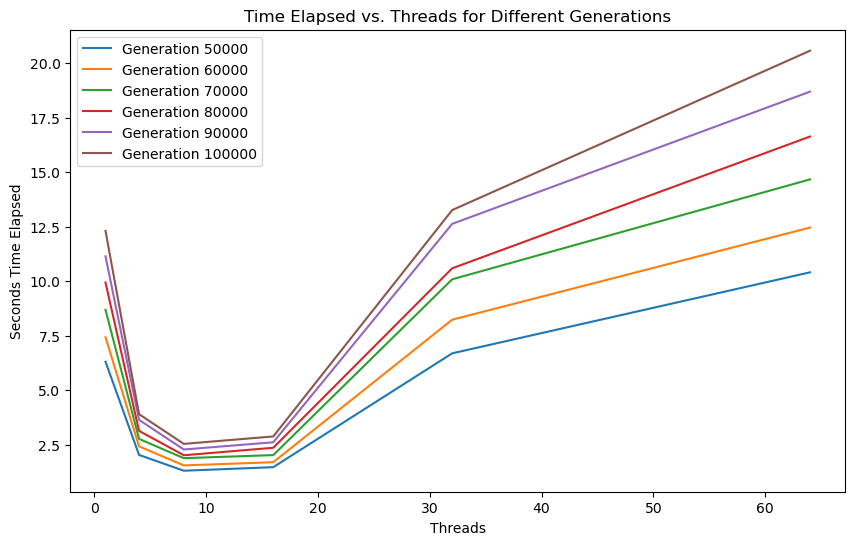

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file created in the previous code
df = pd.read_csv('generation-output.csv')

# Define the range of generations to include in the plot
generations_range = range(50000, 100001, 10000)

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate through the generations
for generation in generations_range:
    # Filter data for the current generation
    df_gen = df[(df['Generations'] == generation) & (df['Rows'] == 50) & (df['Columns'] == 60)]
    plt.plot(df_gen['Thread'], df_gen['Seconds Time Elapsed'], label=f'Generation {generation}')

# Set labels and legend
plt.xlabel('Threads')
plt.ylabel('Seconds Time Elapsed')
plt.legend()
plt.title('Time Elapsed vs. Threads for Different Generations')

# Show the plot
plt.show()


In [ ]:
import re
import pandas as pd

# Regular expression patterns
node_thread_pattern = r"Running on (.+) with (\d+) threads."
program_name_pattern = r"<INPUT_PATH>: ./test/test_g(\d+)_r(\d+)_c(\d+)_i(\d+).in"
cycles_pattern = r"(\d+)\s+cycles"
instructions_pattern = r"(\d+)\s+instructions"
insn_per_cycle_pattern = r"#\s+(\d+\.\d+)\s+insn per cycle"
dcache_load_misses_pattern = r"(\d+)\s+L1-dcache-load-misses"
dcache_accesses_pattern = r"#\s+(\d+\.\d+)% of all L1-dcache accesses"
dcache_loads_pattern = r"(\d+)\s+L1-dcache-loads"
time_elapsed_pattern = r"(\d+\.\d+)\s+seconds time elapsed"

data = []

# Open the performance data file
with open('../results/resultInvasion.log', 'r') as file:
    lines = file.readlines()

# Initialize current_data dictionary
current_data = {}

# Iterate over the lines
for line in lines:
    if "Running on" in line:
        node_thread_match = re.search(node_thread_pattern, line)
        current_data['Node'] = node_thread_match.group(1)
        current_data['Thread'] = int(node_thread_match.group(2))
    elif "<INPUT_PATH>" in line:
        program_name_match = re.search(program_name_pattern, line)
        current_data['Generations'] = int(program_name_match.group(1))
        current_data['Rows'] = int(program_name_match.group(2))
        current_data['Columns'] = int(program_name_match.group(3))
        current_data['Invasions'] = int(program_name_match.group(4))
    elif "cycles" in line:
        current_data['Cycles'] = int(re.search(cycles_pattern, line).group(1).replace(',', ''))
    elif "instructions" in line:
        current_data['Instructions'] = int(re.search(instructions_pattern, line).group(1).replace(',', ''))
        current_data['Instructions per Cycle'] = float(re.search(insn_per_cycle_pattern, line).group(1))
    elif "L1-dcache-load-misses" in line:
        current_data['L1-dcache-load-misses'] = int(re.search(dcache_load_misses_pattern, line).group(1).replace(',', ''))
        current_data['% of all L1-dcache accesses'] = float(re.search(dcache_accesses_pattern, line).group(1))
    elif "L1-dcache-loads" in line:
        current_data['L1-dcache-loads'] = int(re.search(dcache_loads_pattern, line).group(1).replace(',', ''))
    elif "seconds time elapsed" in line:
        current_data['Seconds Time Elapsed'] = float(re.search(time_elapsed_pattern, line).group(1))
        data.append(current_data.copy())

df = pd.DataFrame(data)
df.to_csv('output.csv', index=False)
